# Bibliotecas

In [268]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

______________

In [262]:
start = datetime.datetime(2006, 1, 1)

In [4]:
end = datetime.datetime(2016, 1, 1)

______

In [327]:
banks = pd.read_pickle('all_banks')

In [328]:
banks = banks.transpose()

In [329]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [330]:
banks.head()

Date                     2006-01-03   2006-01-04   2006-01-05   2006-01-06  \
Bank Ticker Stock Info                                                       
BAC         Open              46.92        47.00        46.58        46.80   
            High              47.18        47.24        46.83        46.91   
            Low               46.15        46.45        46.32        46.35   
            Close             47.08        46.58        46.64        46.57   
            Volume      16296700.00  17757900.00  14970900.00  12599800.00   

Date                     2006-01-09   2006-01-10   2006-01-11   2006-01-12  \
Bank Ticker Stock Info                                                       
BAC         Open              46.72        46.40        46.06        46.22   
            High              46.97        46.51        46.25        46.23   
            Low               46.36        45.88        45.75        45.71   
            Close             46.60        46.21        46.10        45.80   
            Volume      15620000.00  15634800.00  14745100.00  10546600.00   

Date                     2006-01-13   2006-01-17  ...   2015-12-17  \
Bank Ticker Stock Info                            ...                
BAC         Open              45.83        45.40  ...        17.80   
            High              46.00        45.58  ...        17.83   
            Low               45.68        45.00  ...        17.30   
            Close             45.80        45.31  ...        17.30   
            Volume      10791300.00  14606100.00  ...  97265726.00   

Date                      2015-12-18   2015-12-21   2015-12-22   2015-12-23  \
Bank Ticker Stock Info                                                        
BAC         Open        1.719000e+01        16.98        17.05        17.16   
            High        1.726000e+01        17.03        17.11        17.34   
            Low         1.676000e+01        16.77        16.85        17.10   
            Close       1.676000e+01        16.97        17.08        17.34   
            Volume      1.367378e+08  65150270.00  56173502.00  65770672.00   

Date                     2015-12-24   2015-12-28   2015-12-29   2015-12-30  \
Bank Ticker Stock Info                                                       
BAC         Open              17.32        17.22        17.25        17.20   
            High              17.38        17.23        17.35        17.24   
            Low               17.22        16.98        17.16        17.04   
            Close             17.27        17.13        17.28        17.05   
            Volume      29373415.00  41777497.00  45670376.00  35066378.00   

Date                     2015-12-31  
Bank Ticker Stock Info               
BAC         Open              17.01  
            High              17.07  
            Low               16.83  
            Close             16.83  
            Volume      47152968.00  

[5 rows x 2517 columns]

______

In [233]:
banks.xs(key = 'Close', level = 'Stock Info').max(axis = 'columns')

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [296]:
returns = pd.DataFrame()
returns2 = pd.DataFrame()
returns3 = pd.DataFrame()


In [252]:
banks.xs(key='BAC', level = 'Bank Ticker').xs(key = 'Open').pct_change().head()

Date
2006-01-03         NaN
2006-01-04    0.001705
2006-01-05   -0.008936
2006-01-06    0.004723
2006-01-09   -0.001709
Name: Open, dtype: float64

______

# WATCH THIS HUGE JOAO HENRI EVOLUTION RIGHT IN FRONT OF YOU

## 1)

In [331]:
for tick in tickers:
    returns[tick + " Returns"] = banks.xs(key=tick, level = 'Bank Ticker').xs(key = 'Open').pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.001705,-0.002857,0.005130,-0.001255,0.026762,0.006329
2006-01-05,-0.008936,-0.008596,-0.010601,-0.004274,-0.002555,-0.009434
2006-01-06,0.004723,0.009083,0.010238,0.007826,0.003757,0.002540
2006-01-09,-0.001709,-0.005728,0.009506,-0.001002,-0.002382,0.003167


## 2)

In [298]:
for tick in tickers:
    returns2[tick + " Returns"] = banks.loc[tick].xs(key='Close').pct_change()
returns2.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


## 3)

In [299]:
for tick in tickers:
    returns3[tick + " Returns"] = banks.loc[tick].loc['Close'].pct_change()
returns3.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


______

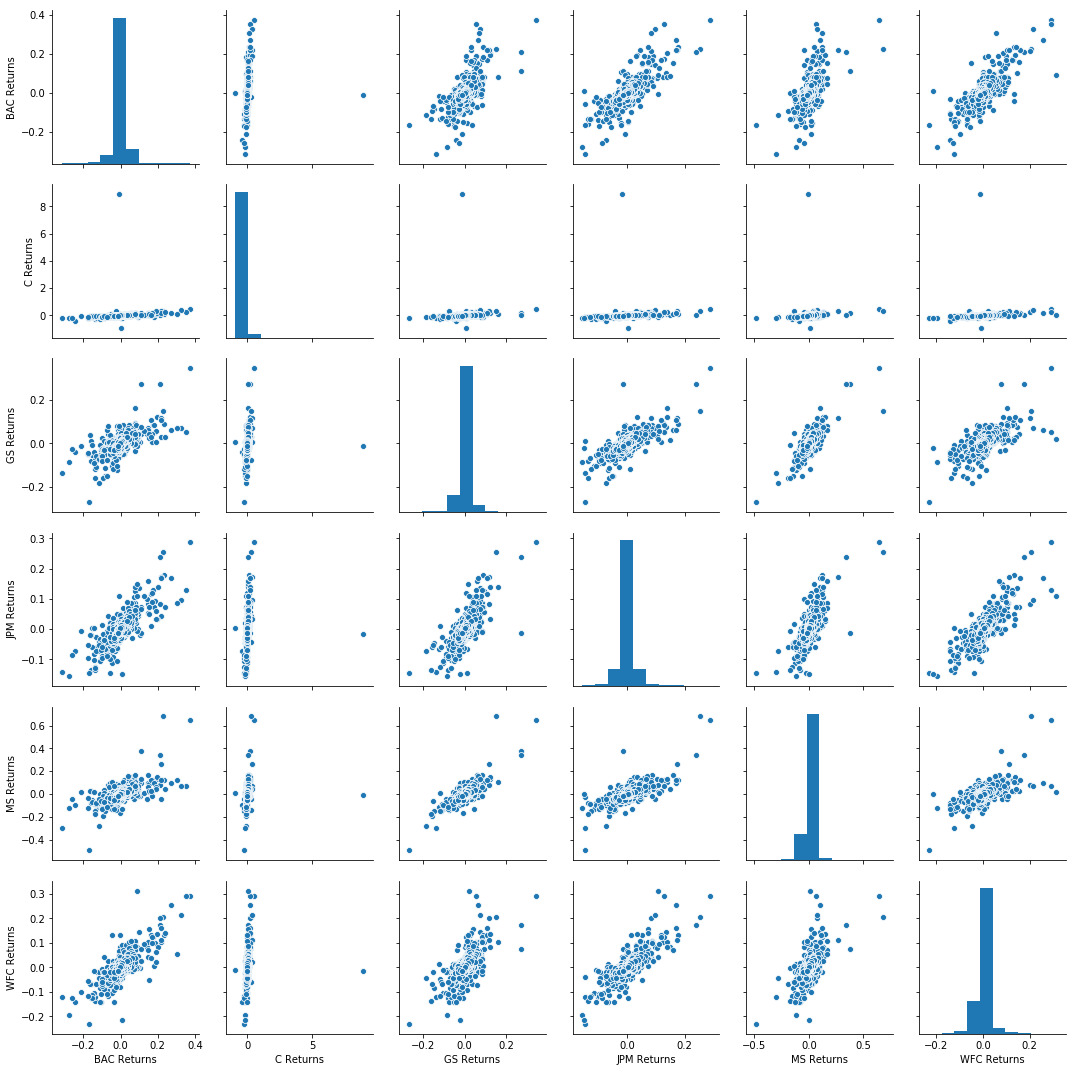

In [300]:
sns.pairplot(data = returns[1:])

___________

In [325]:
returns.head(6)[1:]

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-04,0.001705,-0.002857,0.005130,-0.001255,0.026762,0.006329
2006-01-05,-0.008936,-0.008596,-0.010601,-0.004274,-0.002555,-0.009434
2006-01-06,0.004723,0.009083,0.010238,0.007826,0.003757,0.002540
2006-01-09,-0.001709,-0.005728,0.009506,-0.001002,-0.002382,0.003167
2006-01-10,-0.006849,-0.006173,0.012062,0.015547,0.003752,-0.004104


In [306]:
aa = pd.DataFrame(returns.idxmin(), copy = True) 

In [307]:
aa

,0
BAC Returns,2008-10-08
C Returns,2011-05-06
GS Returns,2008-10-10
JPM Returns,2009-01-20
MS Returns,2008-10-10
WFC Returns,2008-10-10


In [321]:
aa.rename({0: 'Minimal Return Day'}, axis='columns', inplace = True)
aa

,Minimal Return Day
BAC Returns,2008-10-08
C Returns,2011-05-06
GS Returns,2008-10-10
JPM Returns,2009-01-20
MS Returns,2008-10-10
WFC Returns,2008-10-10


In [326]:
returns.idxmin()

BAC Returns   2008-10-08
C Returns     2011-05-06
GS Returns    2008-10-10
JPM Returns   2009-01-20
MS Returns    2008-10-10
WFC Returns   2008-10-10
dtype: datetime64[ns]

___________

In [366]:
returns[((returns['C Returns']==returns['C Returns'].min())  | (returns['C Returns']==returns['C Returns'].max()))]['C Returns']

Date
2011-05-06   -0.898664
2011-05-09    8.865934
Name: C Returns, dtype: float64

___________

In [369]:
returns.std()

BAC Returns    0.038762
C Returns      0.182186
GS Returns     0.026682
JPM Returns    0.027290
MS Returns     0.039452
WFC Returns    0.030022
dtype: float64

In [380]:
returns['2015-01-01':'2016-01-01'].std()

BAC Returns    0.016513
C Returns      0.015961
GS Returns     0.013528
JPM Returns    0.014302
MS Returns     0.017280
WFC Returns    0.014173
dtype: float64

___________

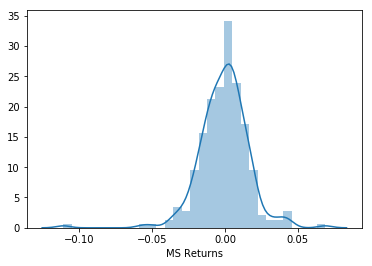

In [388]:
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Returns'])

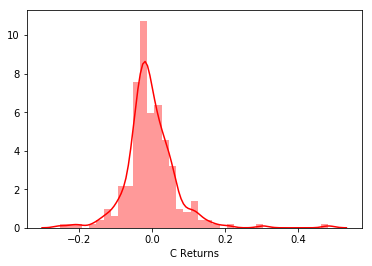

In [392]:
sns.distplot(returns['2008-01-01':'2009-01-01']['C Returns'], color = 'red')

____
# More Visualization



In [393]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [396]:
banks.head(10)

Date                     2006-01-03   2006-01-04   2006-01-05   2006-01-06  \
Bank Ticker Stock Info                                                       
BAC         Open              46.92        47.00        46.58        46.80   
            High              47.18        47.24        46.83        46.91   
            Low               46.15        46.45        46.32        46.35   
            Close             47.08        46.58        46.64        46.57   
            Volume      16296700.00  17757900.00  14970900.00  12599800.00   
C           Open             490.00       488.60       484.40       488.80   
            High             493.80       491.00       487.80       489.00   
            Low              481.10       483.50       484.00       482.00   
            Close            492.90       483.80       486.20       486.20   
            Volume       1537660.00   1871020.00   1143160.00   1370250.00   

Date                     2006-01-09   2006-01-10   2006-01-11   2006-01-12  \
Bank Ticker Stock Info                                                       
BAC         Open              46.72        46.40        46.06        46.22   
            High              46.97        46.51        46.25        46.23   
            Low               46.36        45.88        45.75        45.71   
            Close             46.60        46.21        46.10        45.80   
            Volume      15620000.00  15634800.00  14745100.00  10546600.00   
C           Open             486.00       483.00       495.80       491.00   
            High             487.40       485.50       495.80       491.00   
            Low              483.00       480.80       485.80       488.80   
            Close            483.90       485.40       489.80       490.30   
            Volume       1680740.00   1365960.00   1684440.00   1230060.00   

Date                     2006-01-13   2006-01-17  ...   2015-12-17  \
Bank Ticker Stock Info                            ...                
BAC         Open              45.83        45.40  ...        17.80   
            High              46.00        45.58  ...        17.83   
            Low               45.68        45.00  ...        17.30   
            Close             45.80        45.31  ...        17.30   
            Volume      10791300.00  14606100.00  ...  97265726.00   
C           Open             491.00       485.10  ...        54.01   
            High             491.90       487.00  ...        54.20   
            Low              487.30       482.70  ...        52.71   
            Close            489.20       484.30  ...        52.84   
            Volume        940930.00   1237830.00  ...  17179578.00   

Date                      2015-12-18   2015-12-21   2015-12-22   2015-12-23  \
Bank Ticker Stock Info                                                        
BAC         Open        1.719000e+01        16.98        17.05        17.16   
            High        1.726000e+01        17.03        17.11        17.34   
            Low         1.676000e+01        16.77        16.85        17.10   
            Close       1.676000e+01        16.97        17.08        17.34   
            Volume      1.367378e+08  65150270.00  56173502.00  65770672.00   
C           Open        5.246000e+01        51.71        51.99        52.30   
            High        5.268000e+01        51.91        52.13        52.64   
            Low         5.116000e+01        51.08        51.39        52.08   
            Close       5.121000e+01        51.79        52.01        52.63   
            Volume      2.550962e+07  16928994.00  13241343.00  14950224.00   

Date                     2015-12-24   2015-12-28   2015-12-29   2015-12-30  \
Bank Ticker Stock Info                                                       
BAC         Open              17.32        17.22        17.25        17.20   
            High              17.38        17.23        17.35        17.24   
            Low         

In [419]:
banks.loc['BAC'].loc['Close'].head()

Date
2006-01-03    47.08
2006-01-04    46.58
2006-01-05    46.64
2006-01-06    46.57
2006-01-09    46.60
Name: Close, dtype: float64

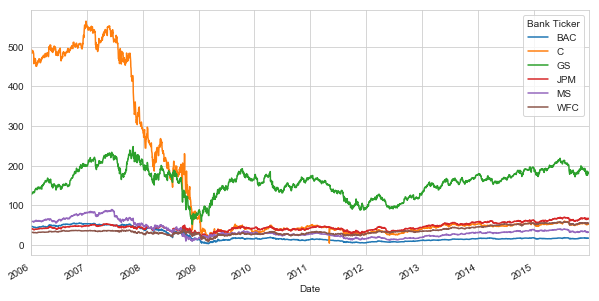

In [435]:
for tick in tickers:
    banks.loc[tick].loc['Close'].plot(figsize=(10,5), label = tick)
plt.legend(title = 'Bank Ticker')

_________

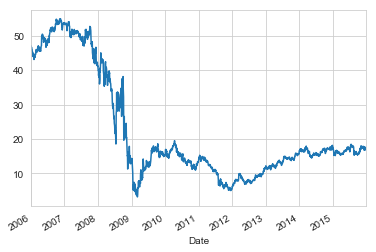

In [451]:
banks.loc['BAC'].loc['Close'].plot()

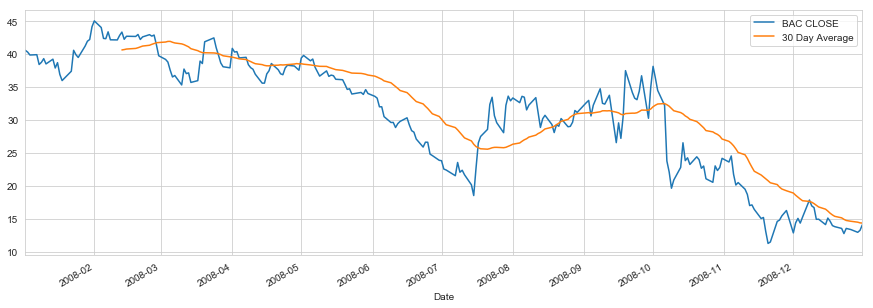

In [550]:
banks.loc['BAC'].loc['Close']['2008-1-01':'2009-1-01'].plot(label = 'BAC CLOSE', figsize=(15,5))
banks.loc['BAC'].loc['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = '30 Day Average')
plt.legend()

_________

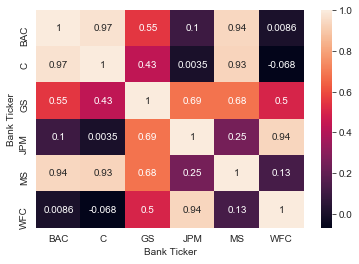

In [582]:
sns.heatmap(banks.transpose().xs(key='Close', level = 'Stock Info', axis = 1).corr(), annot = True)

In [584]:
close_corr = banks.transpose().xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')